In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
import scipy.fftpack as sfft
import cis

## 遅延演算 


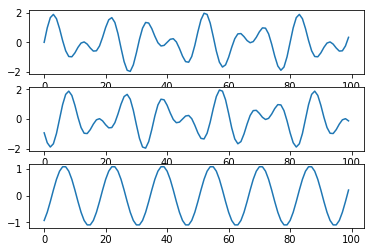

In [3]:
fs = 8000
t =  np.arange(0,1,1/fs)
s=np.sin(2*np.pi*800*t) + np.sin(2*np.pi*500*t)
cis.audioplay(s,fs)

rg = np.arange(0,100)
plt.subplot(3,1,1)
plt.plot(s[rg])
# 要素の位置をずらすことで遅延処理
# あふれた要素は先頭に挿入される
sd=np.roll(s,5)
plt.subplot(3,1,2)
plt.plot(sd[rg]) 

ssd = s+sd
plt.subplot(3,1,3)
plt.plot(ssd[rg]) 

plt.show()

## 移動平均フィルタ

3点移動平均フィルタを作成

### ノイズの作成

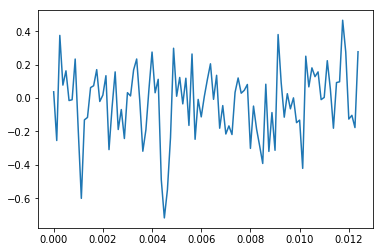

In [4]:
r = np.random.standard_normal(t.shape)
r = 0.8*r/np.max(np.abs(r))
n = np.arange(0,100)
plt.plot(t[n],r[n])
plt.show()
cis.audioplay(r,fs)

### 雑音まじりの正弦波を作成

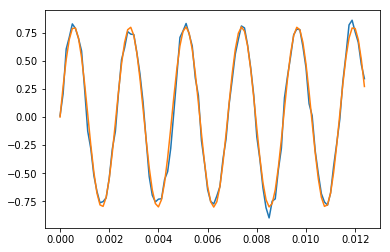

In [5]:
s = np.sin(2*np.pi*440*t)
sn = 0.8*s + 0.25*r
n = np.arange(0, 100)
plt.plot(t[n], sn[n], t[n], 0.8*s[n])
plt.show()
cis.audioplay(sn,fs)

### 3点移動平均フィルタを作成

(8000,)
(8000,)


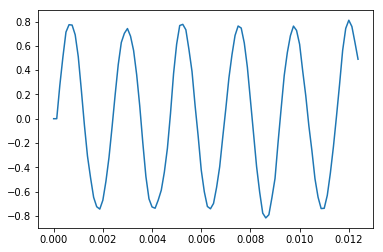

In [6]:
def _mean(x):
    # 移動平均の算出
    
    res = np.zeros(x.shape)
    pn = 3 #移動量
    
    for k in np.arange(pn-1,t.shape[0]):
        res[k] = np.mean(sn[k-pn+1:k+1])
        
    return res

print(sn.shape)
y = _mean(sn)
print(y.shape)
plt.plot(t[n], y[n])

### 畳み込み演算

`np.convolve` で畳み込み

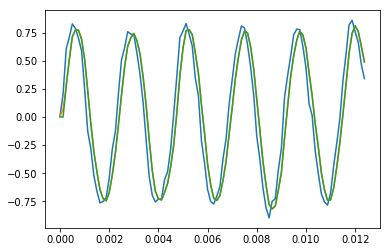

In [7]:
h = np.ones((3,))/3
y2 = np.convolve(h, sn)
plt.plot(t[n], sn[n],t[n], y2[n], t[n], y[n])
plt.show()

## インパルス応答

t=0のときだけ1になるアレ

$$
x[n]=   \begin{cases}
    1 & (n=0) \\
    0 & (otherwise)
  \end{cases}
$$

In [8]:
imp = np.zeros((1024,))
imp[0] =  1